<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/CompletedCNN_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT LIBRARY
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Flatten, Dense, Reshape, Conv2D, MaxPooling2D
import math
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#DEFINE CONSTANTS
batch_size = 128
epochs = 10000

In [ ]:
#DOWNLOAD MNIST DATASET
mnist = keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [ ]:
#NORMALIZATION
test_images = test_images/255.0
train_images = train_images/255.0


In [ ]:
#MODELING
model = keras.Sequential([
                          Flatten(input_shape = (28,28)),
                          Reshape(target_shape=(28,28,1)),
                          Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                          Conv2D(filters=64, kernel_size=(3,3), activation =tf.nn.relu),
                          MaxPooling2D(pool_size=(2,2)),
                          Dropout(0.5),
                          Flatten(input_shape=(28,28)),
                          Dense(128, activation = tf.nn.relu),
                          Dropout(0.5),
                          Dense(10, activation='softmax')

])
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#MODEL SUMMARY
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0

In [ ]:
filepath = 'digits_model.h5'
modelCheckpoint = keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True)

In [ ]:
#Fitting the model with Early Stopping
Earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), batch_size=batch_size, epochs=epochs, callbacks=[Earlystop,modelCheckpoint])

469/469 [==============================] - 149s 318ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 10/10000
469/469 [==============================] - 149s 318ms/step - loss: 0.0346 - accuracy: 0.9880 - val_loss: 0.0268 - val_accuracy: 0.9922
Epoch 11/10000
469/469 [==============================] - 151s 323ms/step - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0278 - val_accuracy: 0.9919
Epoch 12/10000
469/469 [==============================] - 156s 332ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.0269 - val_accuracy: 0.9908
Epoch 13/10000
469/469 [==============================] - 151s 321ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0283 - val_accuracy: 0.9920


In [ ]:
#EVALUATE THE MODEL WITH LOAD MODEL
savefile = 'saved_digits.h5'
model.save(savefile)
load_model = keras.models.load_model(savefile)
test_acc, test_val = load_model.evaluate(test_images, test_labels)
print('Test Accuracy : ', test_acc)



  4/313 [..............................] - ETA: 7s - loss: 0.0062 - accuracy: 1.0000 

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 7s 22ms/step - loss: 0.0283 - accuracy: 0.9920
Test Accuracy :  0.02834543213248253


In [ ]:
#Helper function to display digit images

def show_sample(images, labels, sample_count=25):
  #create a Square with can fit{sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  print(grid_count)
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

5


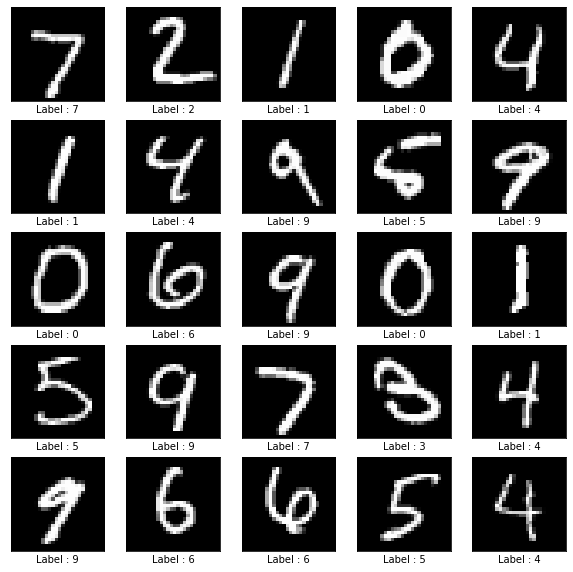

In [ ]:
#show the first 25images in the training Dataset
show_sample(test_images, ['Label : %s' % label for label in test_labels])

Text(0, 0.5, 'accracy')

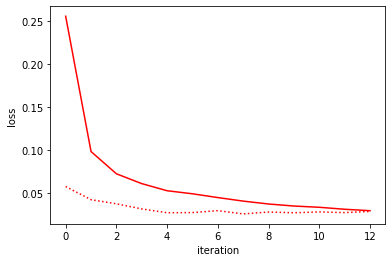

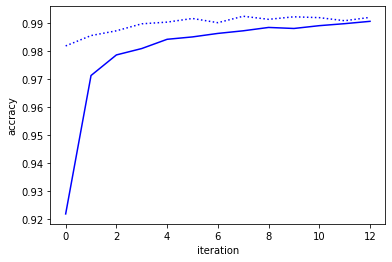

In [ ]:
fig,loss_ax = plt.subplots()
fig,acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'r-', label='train_loss')
loss_ax.plot(history.history['val_loss'], 'r:', label='validation_loss')
loss_ax.set_xlabel('iteration')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['accuracy'], 'b-', label='test_acc')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='validation_acc')
acc_ax.set_xlabel('iteration')
acc_ax.set_ylabel('accracy')